In [1]:
#importing necessary packages
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
#importing data
#since index will act as Day count, we will start index from 1
df = pd.read_csv("WHO-COVID-19-global-data.csv")
df.index+=1
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
...,...,...,...,...,...,...,...,...
148595,2021-09-16,ZW,Zimbabwe,AFRO,266,127083,1,4551
148596,2021-09-17,ZW,Zimbabwe,AFRO,285,127368,9,4560
148597,2021-09-18,ZW,Zimbabwe,AFRO,264,127632,2,4562
148598,2021-09-19,ZW,Zimbabwe,AFRO,107,127739,1,4563


In [4]:
#checking countries available in the dataset
countries = df['Country'].unique()
countries
countries_sel= ["Italy","Germany","Turkey"]
countries_sel

['Italy', 'Germany', 'Turkey']

In [5]:
#checking if selected countries are available in the dataset
data = df[df['Country'].isin(countries_sel)]

#separating data for Italy into another dataframe called "ita"
ita = df[df['Country'] == 'Italy']
ita=ita.reset_index()
ita.index +=1
ita


,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,64582,2020-01-03,IT,Italy,EURO,0,0,0,0
2,64583,2020-01-04,IT,Italy,EURO,0,0,0,0
3,64584,2020-01-05,IT,Italy,EURO,0,0,0,0
4,64585,2020-01-06,IT,Italy,EURO,0,0,0,0
5,64586,2020-01-07,IT,Italy,EURO,0,0,0,0
...,...,...,...,...,...,...,...,...,...
623,65204,2021-09-16,IT,Italy,EURO,4826,4618040,73,130100
624,65205,2021-09-17,IT,Italy,EURO,5115,4623155,67,130167
625,65206,2021-09-18,IT,Italy,EURO,4544,4627699,66,130233
626,65207,2021-09-19,IT,Italy,EURO,4576,4632275,51,130284


In [6]:
#separating data for Germany into another dataframe called "ger"
ger = df[df['Country'] == 'Germany']
ger=ger.reset_index()
ger.index +=1
ger

,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,48907,2020-01-03,DE,Germany,EURO,0,0,0,0
2,48908,2020-01-04,DE,Germany,EURO,0,0,0,0
3,48909,2020-01-05,DE,Germany,EURO,0,0,0,0
4,48910,2020-01-06,DE,Germany,EURO,0,0,0,0
5,48911,2020-01-07,DE,Germany,EURO,0,0,0,0
...,...,...,...,...,...,...,...,...,...
623,49529,2021-09-16,DE,Germany,EURO,12925,4114856,68,92837
624,49530,2021-09-17,DE,Germany,EURO,11022,4125878,20,92857
625,49531,2021-09-18,DE,Germany,EURO,8901,4134779,63,92920
626,49532,2021-09-19,DE,Germany,EURO,7337,4142116,38,92958


In [7]:
#separating data for Turkey into another dataframe called "tur"
tur = df[df['Country'] == 'Turkey']
tur=tur.reset_index()
tur.index +=1
tur

,index,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
1,136687,2020-01-03,TR,Turkey,EURO,0,0,0,0
2,136688,2020-01-04,TR,Turkey,EURO,0,0,0,0
3,136689,2020-01-05,TR,Turkey,EURO,0,0,0,0
4,136690,2020-01-06,TR,Turkey,EURO,0,0,0,0
5,136691,2020-01-07,TR,Turkey,EURO,0,0,0,0
...,...,...,...,...,...,...,...,...,...
623,137309,2021-09-16,TR,Turkey,EURO,28224,6738890,248,60641
624,137310,2021-09-17,TR,Turkey,EURO,28118,6767008,262,60903
625,137311,2021-09-18,TR,Turkey,EURO,27692,6794700,237,61140
626,137312,2021-09-19,TR,Turkey,EURO,26161,6820861,221,61361


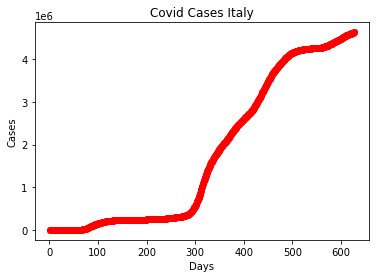

In [8]:
#checking graph of cumulative cases for Italy using plt
x = ita.index.values
y = ita['Cumulative_cases']
plt.scatter(x, y, c='r', marker='o')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.title('Covid Cases Italy')
plt.show()

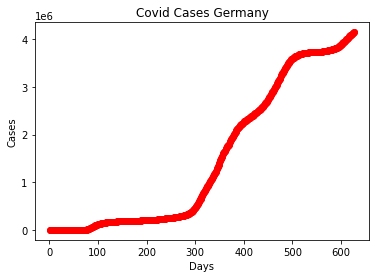

In [9]:
#checking graph of cumulative cases for Germany using plt
x = ger.index.values
y = ger['Cumulative_cases']
plt.scatter(x, y, c='r', marker='o')

plt.xlabel('Days')
plt.ylabel('Cases')
plt.title('Covid Cases Germany')
plt.show()

In [10]:
ita['Cumulative_cases']

1            0
2            0
3            0
4            0
5            0
        ...   
623    4618040
624    4623155
625    4627699
626    4632275
627    4636111
Name: Cumulative_cases, Length: 627, dtype: int64

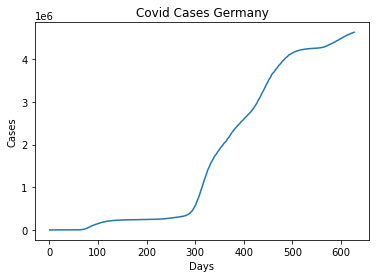

In [11]:
fig,ax=plt.subplots()
ax.plot(ita.index.values,ita['Cumulative_cases'])
plt.xlabel('Days')
plt.ylabel('Cases')
plt.title('Covid Cases Germany')
plt.show()

In [12]:
#checking start of covid for Italy
ita_case =ita['Cumulative_cases'].head(100)
#print(ita_case)
#print(ita_case.index.values)
for i in range(len(ita_case)):
    i=i+1
    if ita_case[i] >= 50:
        print(i)
        break

52


In [13]:
print(ita.loc[[52]])

    index Date_reported Country_code Country WHO_region  New_cases  \
52  64633    2020-02-23           IT   Italy       EURO         62   

    Cumulative_cases  New_deaths  Cumulative_deaths  
52                79           2                  2  


In [14]:
#checking start of covid for Germany
ger_case =ger['Cumulative_cases'].head(100)
#print(ger_case)
#print(ger_case.index.values)
for i in range(len(ger_case)):
    i=i+1
    if ger_case[i] >= 50:
        print(i)
        break

58


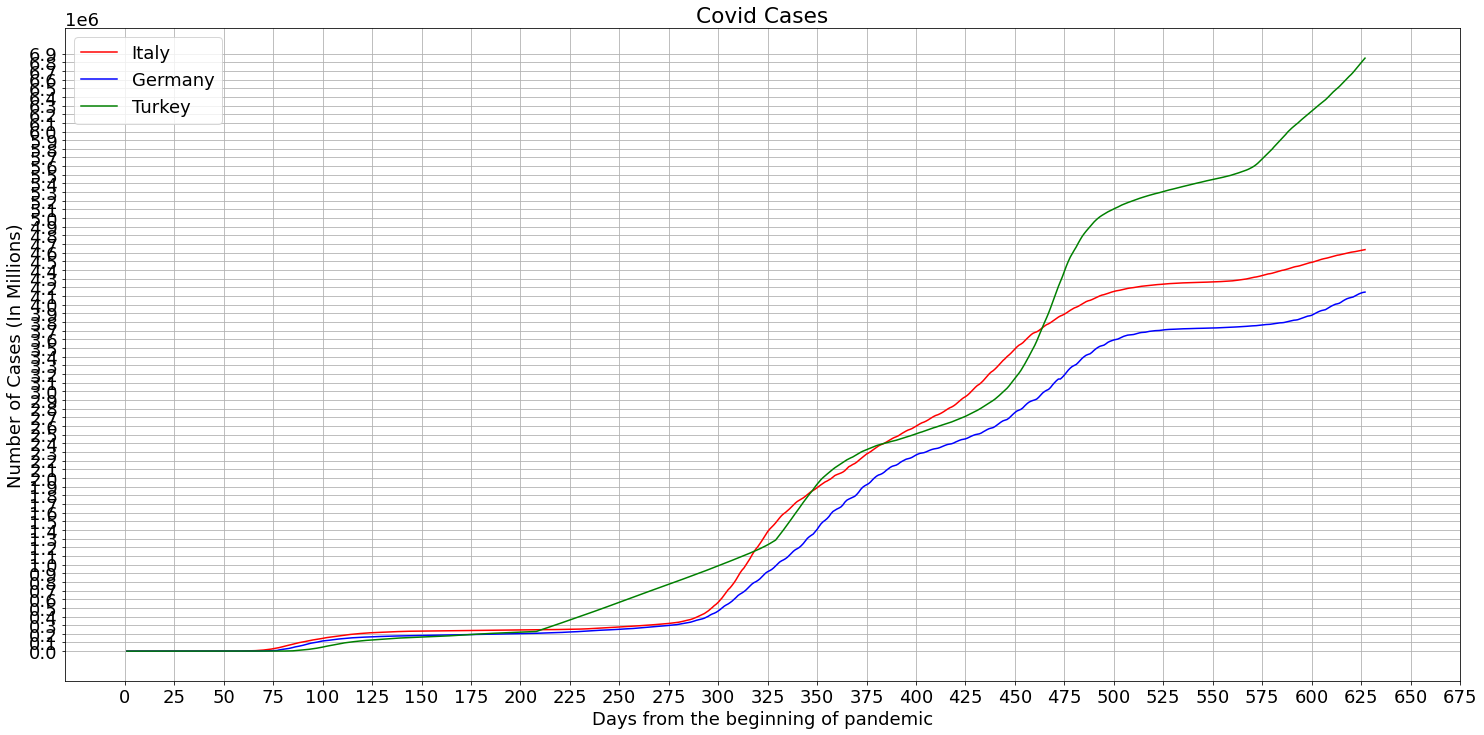

In [17]:
#data graphs of each country
x1 = ita.index.values
y1 = ita['Cumulative_cases']
x2 = ger.index.values
y2 = ger['Cumulative_cases']
x3 = tur.index.values
y3 = tur['Cumulative_cases']

plt.plot(x1,y1, color="red", label = 'Italy')
plt.plot(x2,y2, color="blue", label = 'Germany')
plt.plot(x3,y3, color="green", label = 'Turkey')
plt.yticks(np.arange(0, 7000000, 100000))
plt.xticks(np.arange(0,700,25))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Number of Cases (In Millions)')
plt.title('Covid Cases')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [25,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

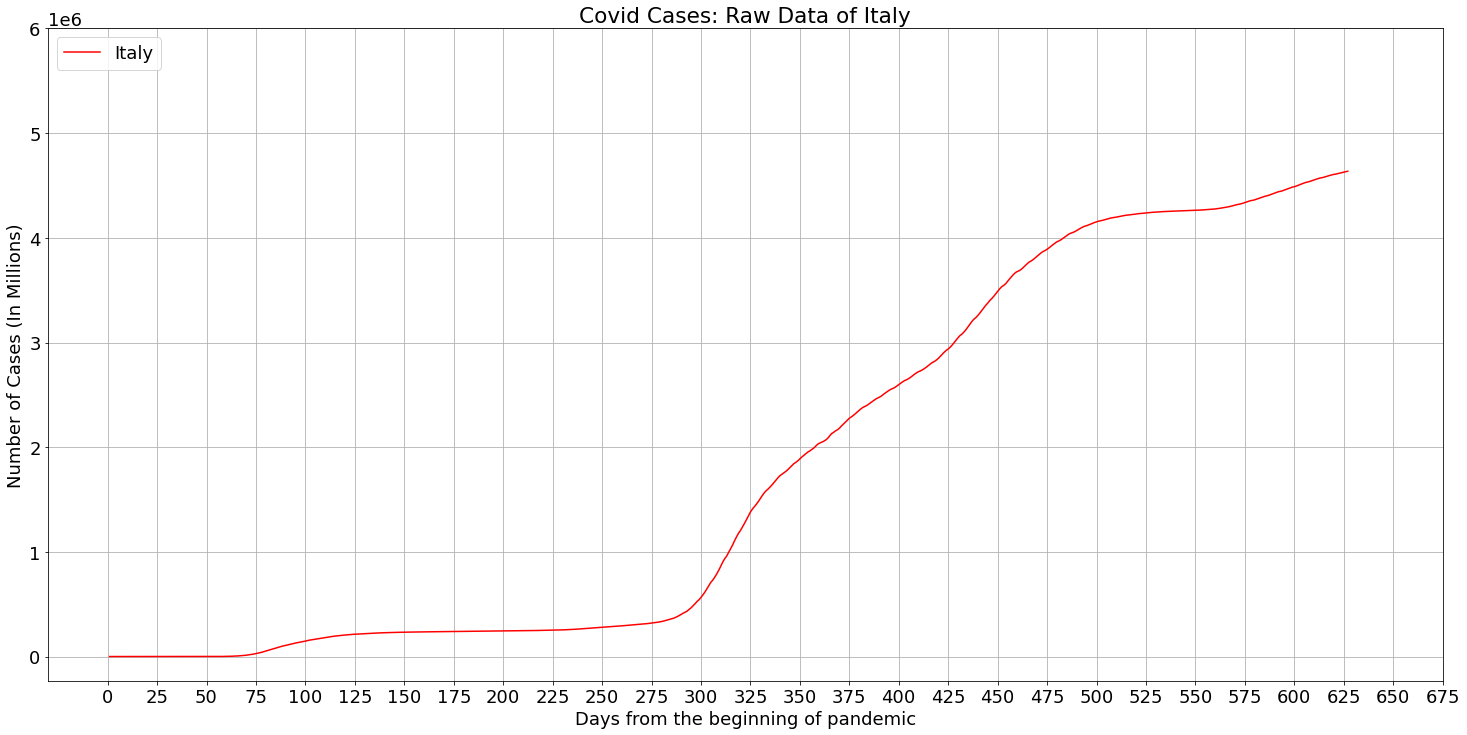

In [23]:
#graph for Italy's cumulative cases data
x1 = ita.index.values
y1 = ita['Cumulative_cases']

fig,ax=plt.subplots()
ax.plot(x1,y1, color="red", label = 'Italy')
ax.yaxis.set_ticks(np.arange(0, 7000000, 1000000))
ax.xaxis.set_ticks(np.arange(0,700,25))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Number of Cases (In Millions)')
plt.title('Covid Cases: Raw Data of Italy')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [25,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

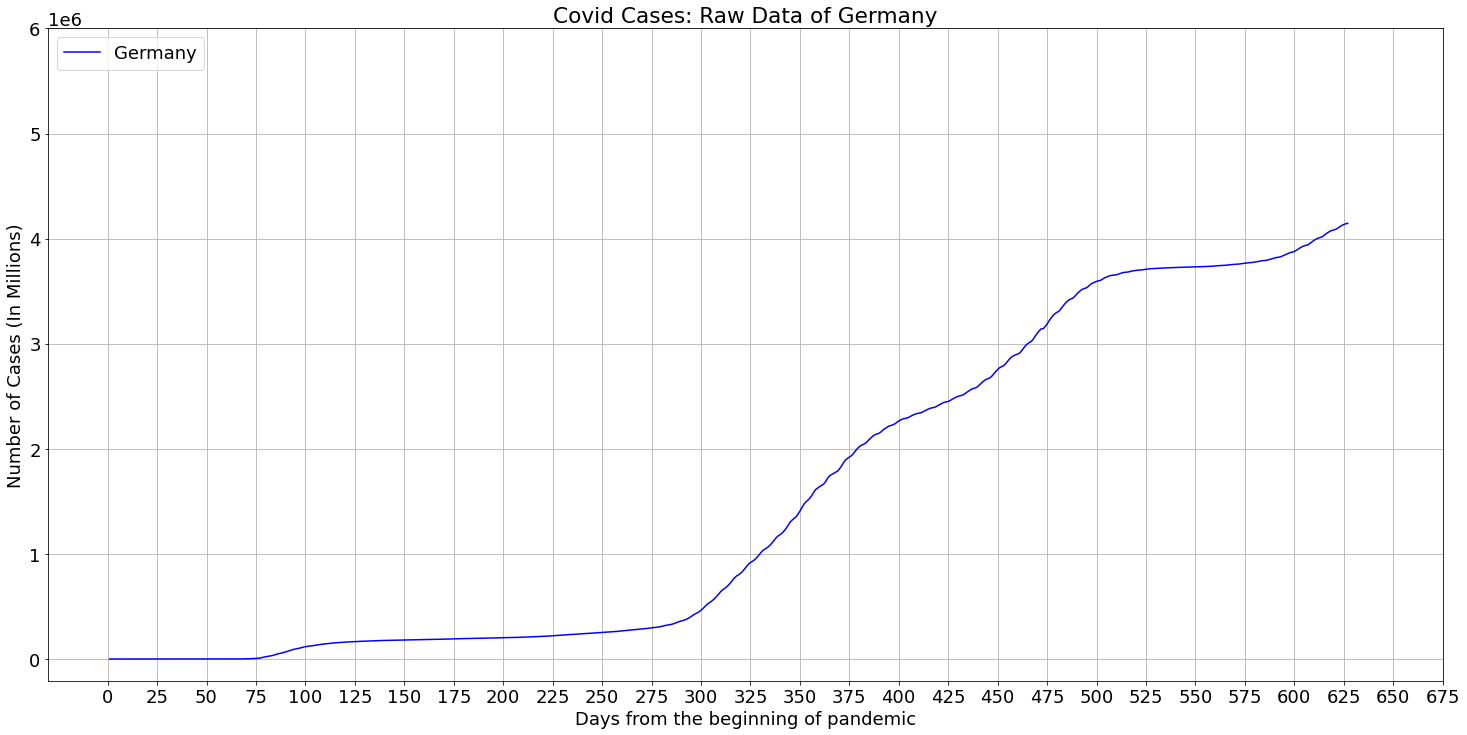

In [16]:
#graph for Germany's cumulative cases data
x2 = ger.index.values
y2 = ger['Cumulative_cases']

fig,ax=plt.subplots()

ax.plot(x2,y2, color="blue", label = 'Germany')

ax.yaxis.set_ticks(np.arange(0, 7000000, 1000000))
ax.xaxis.set_ticks(np.arange(0,700,25))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Number of Cases (In Millions)')
plt.title('Covid Cases: Raw Data of Germany')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [25,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

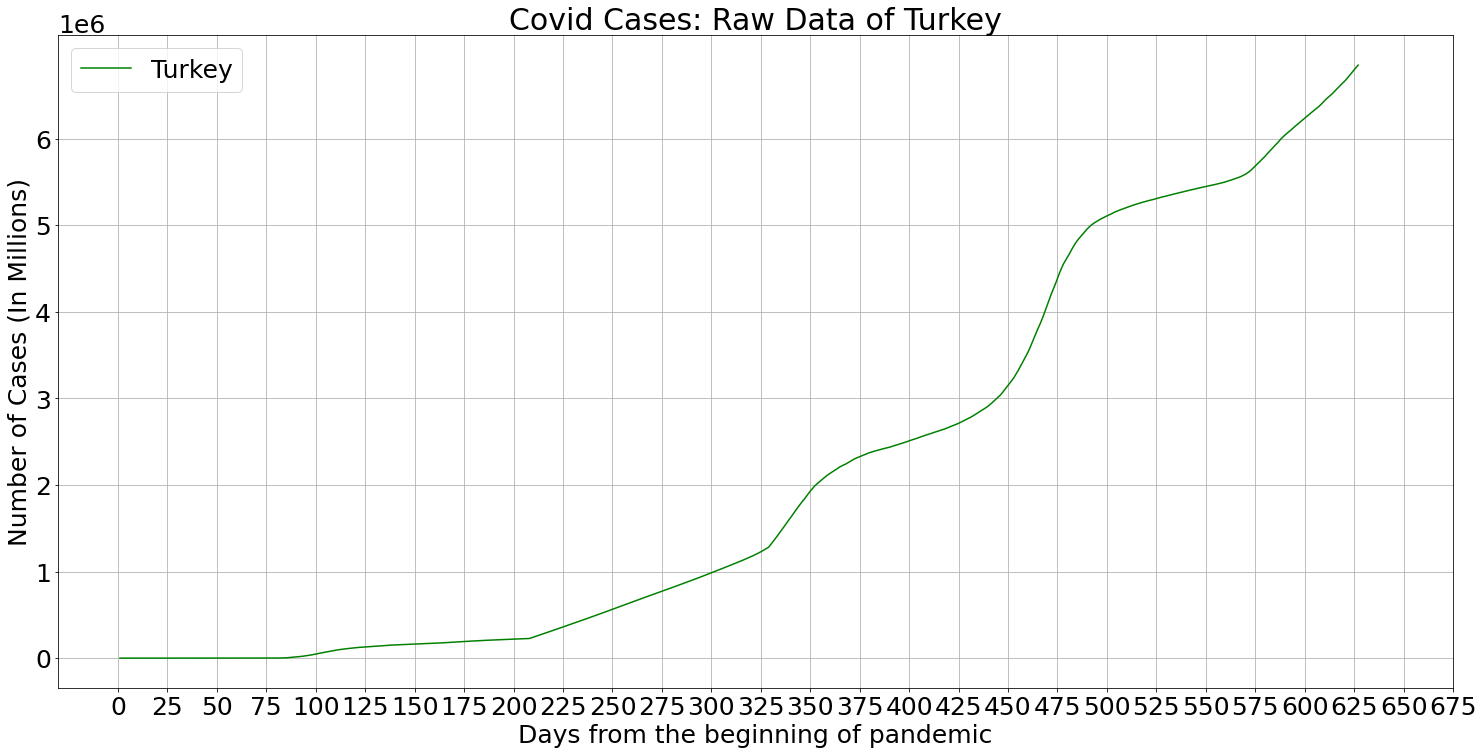

In [22]:
#graph for Turkey's cumulative cases data
x3 = tur.index.values
y3 = tur['Cumulative_cases']
fig,ax=plt.subplots()

ax.plot(x3,y3, color="green", label = 'Turkey')
ax.yaxis.set_ticks(np.arange(0, 7000000, 1000000))
ax.xaxis.set_ticks(np.arange(0,700,25))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Number of Cases (In Millions)')
plt.title('Covid Cases: Raw Data of Turkey')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [25,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

# Normalising Cumulative Data

Country Populations:

Italy: 59.55 million (2020)
Germany: 83.24 million (2020)
Turkey: 84.34 million (2020)

In [ ]:
#final cumulative value
ita_total_cases = ita['Cumulative_cases'].iloc[[-1]]

In [ ]:
#normalising data: dividing by population of country and plotting graph for normalised data
x1 = ita.index.values
y1 = ita['Cumulative_cases']/59550000
x2 = ger.index.values
y2 = ger['Cumulative_cases']/83240000
x3 = tur.index.values
y3 = tur['Cumulative_cases']/84340000
fig,ax=plt.subplots()
ax.plot(x1,y1, color="red", label = 'Italy')
ax.plot(x2,y2, color="blue", label = 'Germany')
ax.plot(x3,y3, color="yellow", label = 'Turkey')
#ax.yaxis.set_ticks(np.arange(0, 7000000, 100))
ax.xaxis.set_ticks(np.arange(0,700,25))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Cumulative Fraction (In Millions)')
plt.title('Normalised Data')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [25,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

In [ ]:
len(ita)

In [ ]:
for i in range(len(ita)):
    i+=1
    c= ita.loc[i, "Cumulative_cases"]
    if c>=50:
        print(i,c)
        break

In [ ]:
ita.head()

In [ ]:
#checking
result= ita.iloc[52]
result

In [ ]:
for i in range(len(ger)):
    i+=1
    c= ger.loc[i, "Cumulative_cases"]
    if c>=50:
        print(i,c)
        break

In [ ]:
result= ger.iloc[58]
result

In [ ]:
for i in range(len(tur)):
    i+=1
    c= tur.loc[i, "Cumulative_cases"]
    if c>=50:
        print(i,c)
        break

In [ ]:
result= tur.iloc[76]
result

## Version 3: Approximation of Logarithmic Graph(split the time series of each country into several waves)

### ITALY

In [ ]:
x_ita= ita.index.values

In [ ]:
n= len(ita['Cumulative_cases'])
y_ita=np.empty(n)
frac=np.empty(n)

In [ ]:
for i in range(n-1):
    i+=1
    try:
        frac[i-1]=(ita['Cumulative_cases'][i])/59550000
    except ZeroDivisionError:
        frac[i-1] = 0 
    if(frac[i-1] != 0):
        y_ita[i-1]= np.log(frac[i-1])
    else:
        y_ita[i-1]=0


p = polyfit(x,y,n) returns the coefficients for a polynomial p(x) of degree n that is a best fit (in a least-squares sense) for the data in y. The coefficients in p are in descending powers, and the length of p is n+1.

In [ ]:
x_ita1=x_ita[44:81]
y_ita1=y_ita[44:81]
ita_curve1 = np.polyfit(x_ita1,y_ita1,1)
print(ita_curve1)

x_ita2=x_ita[81:286]
y_ita2=y_ita[81:286]
ita_curve2 = np.polyfit(x_ita2,y_ita2,1)
print(ita_curve2)

x_ita3=x_ita[286:325]
y_ita3=y_ita[286:325]
ita_curve3 = np.polyfit(x_ita3,y_ita3,1)
print(ita_curve3)

x_ita4=x_ita[325:625]
y_ita4=y_ita[325:625]
ita_curve4 = np.polyfit(x_ita4,y_ita4,1)
print(ita_curve4)

In [ ]:
a1= ita_curve1[0]
b1=ita_curve1[1]
a2=ita_curve2[0]
b2=ita_curve2[1]
a3=ita_curve3[0]
b3=ita_curve3[1]
a4=ita_curve4[0]
b4=ita_curve4[1]

In [ ]:
y1 = a1*x_ita1 +b1
y2 = a2*x_ita2 +b2
y3 = a3*x_ita3 +b3
y4 = a4*x_ita4 +b4

In [ ]:
fig,ax=plt.subplots()
ax.plot(x_ita,y_ita,color="blue")
ax.plot(x_ita1,y1,color="red")
ax.plot(x_ita2,y2,color="green")
ax.plot(x_ita3,y3,color="red")
ax.plot(x_ita4,y4,color="green")
ax.xaxis.set_ticks(np.arange(0,700,13))
plt.title('Italy Covid Cases in Logarithmic Waves')
plt.xlabel('Days from the beginning of pandemic')
plt.rcParams['figure.figsize'] = [30,20]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()

### GERMANY

In [ ]:
x_ger = ger.index.values
n2= len(ger['Cumulative_cases'])
y_ger=np.empty(n2)
frac_g=np.empty(n2)

In [ ]:
for i in range(n2-1):
    i+=1
    try:
        frac_g[i-1]=(ger['Cumulative_cases'][i])/83240000
    except ZeroDivisionError:
        frac_g[i-1] = 0 
    if(frac_g[i-1] != 0):
        y_ger[i-1]= np.log(frac_g[i-1])
    else:
        y_ger[i-1]=0

In [ ]:
x2 = ger.index.values
fig,ax=plt.subplots()

ax.plot(x2,y_ger, color="blue", label = 'Germany')

ax.yaxis.set_ticks(np.arange(-5, 5, 0.00001))
ax.xaxis.set_ticks(np.arange(0,700,25))
plt.xlabel('Days from the beginning of pandemic')
plt.ylabel('Number of Cases (In Millions)')
plt.title('Covid Cases: Raw Data of Germany')
plt.legend(loc="upper left")
plt.rcParams['figure.figsize'] = [25,12]
plt.rcParams.update({'font.size': 18})
plt.grid()
plt.show()